# Visualizing q-agent

In [1]:
import dominoes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q_agent = dominoes.players.QAgent()
q_agent.train(100_000)

Done training


# 0. Visualizing the training

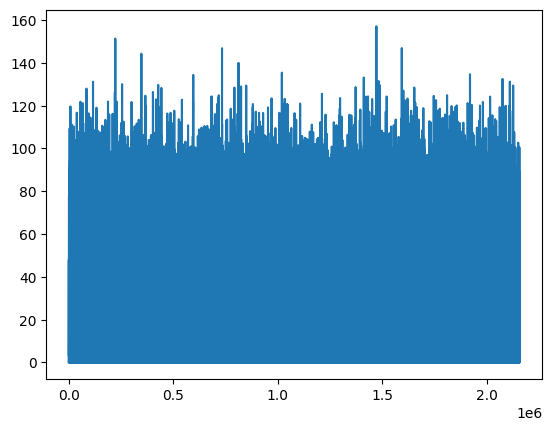

In [3]:
plt.plot(range(len(q_agent.training_error)), q_agent.training_error)

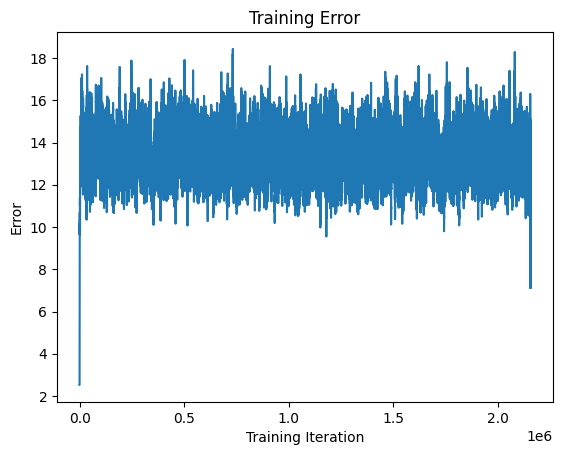

In [4]:
rolling_length = 500
# compute and assign a rolling average of the data to provide a smoother graph
training_error_moving_average = (
    np.convolve(np.array(q_agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
fig = plt.plot(range(len(training_error_moving_average)), training_error_moving_average)

# set title and labels
plt.title("Training Error")
plt.xlabel("Training Iteration")
plt.ylabel("Error")
plt.show()


# 1. Visualizing the value function

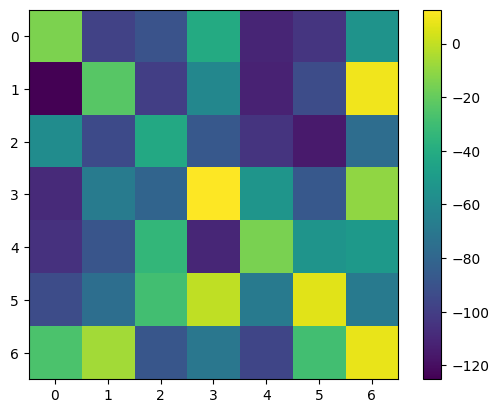

In [5]:

# convert state-action values to state values
state_values = dict()
for key in q_agent.q:
    state = key[0]
    if state not in state_values:
        state_values[state] = q_agent.q[key]
    else:
        state_values[state] += q_agent.q[key]

# create the value grid for plotting
value_grid = np.zeros((7,7))
for key in state_values:
    value_grid[key[0], key[1]] = state_values[key]

# plot the value grid
plt.imshow(value_grid)
plt.colorbar()
plt.show()
